# Text data to numeric data

About the Dataset:

1. id:    unique id for a news article
2. title: the title of a news article
3. author:author of the news article
4. text:  the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:

    1: Fake news
    
    0: real News

## Importing the Dependencies

# Building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [1]:
! pip install nltk

In [2]:
import numpy as np
import pandas as pd
import re                   # regular expressions: searching the text data in the document
from nltk.corpus import stopwords   # natural language toolkit:body of the text  
from nltk.stem.porter import PorterStemmer # stemming is a function as it takes a word and removes the prefix and suffix of it and return the root node  
from sklearn.feature_extraction.text import TfidfVectorizer # convert text to feature vectors that is the numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# stopwords means the kind of words which don't add much value to the paragraph such as a, the etc...
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Pre-processing

In [5]:
# loading the dataset to a pandas DataFrame
sms = pd.read_csv("spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,names=["label", "message"])

In [6]:
sms.shape

(5572, 2)

In [7]:
# print the first 5 rows of the dataframe
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# counting the number of missing values in the dataset
sms.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
# replacing the null values with empty string
sms = sms.fillna('')

In [10]:
# label encoding
sms['label'] = sms['label'].apply(lambda x: 1 if x == 'spam' else 0)
sms['label']=sms['label'].astype(int)

In [11]:
# check duplications 
sms.duplicated().sum(),sms.shape

(403, (5572, 2))

In [12]:
# delete duplicated values 
sms=sms.drop_duplicates(keep='first')
sms.shape

(5169, 2)

In [13]:
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Data Analysis

In [14]:
# separating the data & label
X = sms.drop(columns='label', axis=1)
Y = sms['label']

In [15]:
print(X)

                                                message
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
...                                                 ...
5567  This is the 2nd time we have tried 2 contact u...
5568              Will Ì_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name

[5169 rows x 1 columns]


In [16]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32


## Stemming: Stemming is the process of reducing a word to its Root word
example: actor, actress, acting --> act

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # ^ meaning is eliminate
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
sms['message'] = sms['message'].apply(stemming)

In [20]:
print(sms['message'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object


In [21]:
#separating the data and label
X = sms['message'].values
Y = sms['label'].values

In [22]:
print(X)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth els next week gave us free'
 'rofl true name']


In [23]:
print(Y)

[0 0 1 ... 0 0 0]


In [24]:
Y.shape

(5169,)

In [25]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer() # number of times a particular word is repeating
vectorizer.fit(X)

X = vectorizer.transform(X)

![](tf-idf.png)

In [26]:
print(X)

  (0, 6060)	0.24517129496631945
  (0, 5886)	0.19415459400606994
  (0, 4046)	0.24004800434772433
  (0, 2898)	0.283608368159408
  (0, 2794)	0.35120222986216304
  (0, 2222)	0.1960891411830625
  (0, 2185)	0.16428949612077923
  (0, 2148)	0.14014301119494849
  (0, 1162)	0.271310616118712
  (0, 957)	0.29623517065178584
  (0, 732)	0.29623517065178584
  (0, 730)	0.33512539565566796
  (0, 377)	0.26634785345973966
  (0, 188)	0.35120222986216304
  (1, 5982)	0.4431000927770725
  (1, 3743)	0.5625674771645618
  (1, 3718)	0.2848686019861351
  (1, 2926)	0.41888998866688537
  (1, 2761)	0.4801678856553941
  (2, 6026)	0.21760934653906108
  (2, 5993)	0.16095350160140515
  (2, 5629)	0.13630504897076176
  (2, 5474)	0.2537564471752361
  (2, 5361)	0.1285823987975333
  (2, 5072)	0.2243088271059698
  :	:
  (5164, 777)	0.15939723913633064
  (5164, 719)	0.30135262240932337
  (5165, 2431)	0.37639843863524536
  (5165, 2148)	0.29600715859500404
  (5165, 1979)	0.5730566504115094
  (5165, 1690)	0.6650639464537247
  (51

In [27]:
# Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

In [28]:
# Training the Model: Logistic Regression
model = LogisticRegression(C=20.0,max_iter=1000)

In [29]:
model.fit(X_train, Y_train)

LogisticRegression(C=20.0, max_iter=1000)

## Evaluation

#### accuracy score

In [30]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9995163240628778


In [32]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9748549323017408


# Prediction

In [34]:
X_new = X_test[8]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The sms is Real')
else:
    print('The sms is Fake')

[0]
The sms is Real


In [35]:
print(Y_test[8])

0


In [36]:
import matplotlib.pyplot as plt

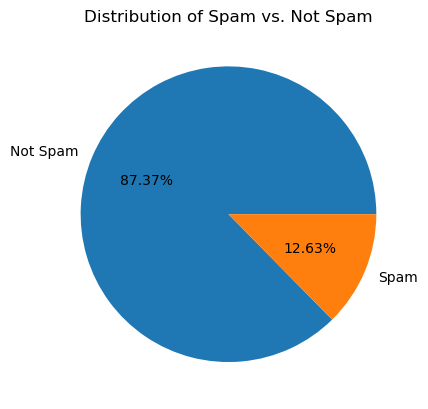

In [37]:
plt.pie(sms['label'].value_counts(),labels=['Not Spam','Spam'], autopct='%1.2f%%')
plt.title('Distribution of Spam vs. Not Spam')
plt.show()